# Prediction using Supervised ML
## Apurva Kulpe

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

#### Problem statement: Given(no. of hours a student studies for), Prediction of score

In [60]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [61]:
df.describe().columns

Index(['Hours', 'Scores'], dtype='object')

## DATA Visualization

Text(0.5, 0.98, 'Hours vs Percentage Score')

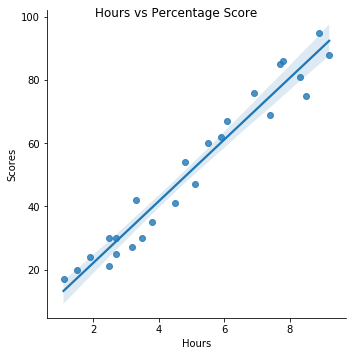

In [62]:
sns.lmplot(x="Hours", y="Scores", data=df).fig.suptitle("Hours vs Percentage Score")

## Training and Testing

In [109]:
from sklearn.model_selection import train_test_split

In [115]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# By default the training and testing will be in 70-30 ratio.

In [116]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [117]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [118]:
linReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
linReg.score(X_test, Y_test)

0.9454906892105356

In [120]:
y_pred = linReg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [122]:
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})    

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [123]:
linReg.coef_

array([9.91065648])

In [124]:
linReg.intercept_

2.018160041434683

### Visualization

In [125]:
predicted_scores = linReg.predict(X)

Text(0, 0.5, 'Percentage Scores')

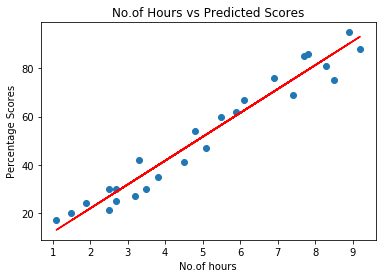

In [126]:
plt.scatter(X, Y)
plt.plot(X, predicted_scores, color='r')
plt.title('No.of Hours vs Predicted Scores')
plt.xlabel('No.of hours')
plt.ylabel('Percentage Scores')

## Evaluating the model

In [132]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))
print('Median Absolute Error:',
      metrics.median_absolute_error(Y_test, y_pred))
print('Maximum Error:',
      metrics.max_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Median Absolute Error: 3.2051987569597244
Maximum Error: 6.732260779489842
